In [4]:
import pandas as pd
import importlib
import seaborn as sns
import preprocessing

from models import vader_sa as vader
from models import afinn_sa as afinn

import utils
import numpy as np

importlib.reload(preprocessing)


<module 'preprocessing' from '/Users/venugopalbhatia/Documents/Computational Methods for Informatics/Assignments/Project/preprocessing.py'>

In [5]:
data_df = pd.read_csv("./data/Corona_Tweet_Data_processed.csv",parse_dates=['TweetAt'],index_col = 0,dtype={'UserName': 'str', 'ScreenName': 'str','Location':'str'},converters={"message_tokens_lemmatized": lambda x: x.strip("[]").replace("'","").split(", "),"message_tokenized": lambda x: x.strip("[]").replace("'","").split(", "),"mentions":lambda x: x.strip("[]").replace("'","").split(", ")})

In [6]:
data_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,...,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score,lemmatized_message,Tweet_Length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],"[MeNyrbie, Phil_Gahan, Chrisitv]",[],"['https://t.co/iFz9FAn2Pa', 'https://t.co/xX6g...",...,[],0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,NaN,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],[],[],[],...,"[advice, talk, neighbour, family, exchange, ph...",1.0,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.000,0.923,0.077,0.2500,1.0,advice talk neighbour family exchange phone nu...,187
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[],[],[],['https://t.co/bInCA9Vp8P'],...,"[coronavirus, australia, woolworths, give, eld...",1.0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.000,0.812,0.188,0.4588,0.0,coronavirus australia woolworths give elderly ...,99
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,[],[],"['COVID19france', 'COVID_19', 'COVID19', 'coro...",['https://t.co/zrlG0Z520j'],...,"[food, stock, one, empty, please, panic, enoug...",1.0,"{'neg': 0.101, 'neu': 0.735, 'pos': 0.164, 'co...",0.101,0.735,0.164,0.4824,0.0,food stock one empty please panic enough food ...,174
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,[],[],"['COVID19', 'coronavirus', 'CoronavirusFrance'...",['https://t.co/usmuaLq72n'],...,"[ready, go, supermarket, covid19, outbreak, pa...",-2.0,"{'neg': 0.238, 'neu': 0.669, 'pos': 0.093, 'co...",0.238,0.669,0.093,-0.7506,-7.0,ready go supermarket covid19 outbreak paranoid...,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,[],[],"['NZ', 'COVID']",['https://t.co/cz89uA0HNp'],...,"[airline, pilot, offer, stock, supermarket, sh...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,airline pilot offer stock supermarket shelf nz...,64
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,[],[],[],[],...,"[response, complaint, provide, cite, covid, 19...",-2.0,"{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'comp...",0.198,0.802,0.000,-0.6369,-3.0,response complaint provide cite covid 19 relat...,101
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive,[],"[KameronWilds, kroger]","['coronavirus', 'toiletpaper']",[],...,"[know, get, tough, rationing, toilet, paper, c...",1.0,"{'neg': 0.078, 'neu': 0.781, 'pos': 0.141, 'co...",0.078,0.781,0.141,0.2960,2.0,know get tough rationing toilet paper coronavi...,81
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,[],[],"['coronavirus', 'COVID19', 'coronavirus']",[],...,"[wrong, smell, hand, sanitizer, start, turn, c...",0.0,"{'neg': 0.139, 'neu': 0.717, 'pos': 0.143, 'co...",0.139,0.717,0.143,0.0258,-2.0,wrong smell hand sanitizer start turn coronavi...,69


In [75]:
data_df['TweetAt'] = pd.to_datetime(data_df['TweetAt'],errors = 'coerce')

In [28]:
data_df['TweetAt'].sort_values()

25915     2020-01-04
25916     2020-01-04
25917     2020-01-04
25918     2020-01-04
25919     2020-01-04
             ...    
39210     2020-12-04
39220     2020-12-04
39063     2020-12-04
NaN              NaT
Neutral          NaT
Name: TweetAt, Length: 41159, dtype: datetime64[ns]

Looking at locations

In [96]:
data_df['Location'] = data_df['Location'].str.strip()
locations = data_df['Location'].str.replace("[-?$&+.:;=?@#|'<>.^*()%!-]","",regex = True)

In [97]:
locations = locations.dropna()
locations = locations.str.strip()
locations = locations[(locations!='') | (locations!=",")]
locations = np.unique(locations,return_counts = True)

In [220]:
#np.save("./data/locations.npy",locations)

In [102]:
locations[0][locations[1]>10]

array(['', ',', 'Abuja', 'Abuja, Nigeria', 'Accra, Ghana',
       'Adelaide, South Australia', 'Africa', 'Alabama, USA',
       'Alberta, Canada', 'Albuquerque, NM', 'Alexandria, VA', 'America',
       'Amsterdam', 'Amsterdam, The Netherlands', 'Ann Arbor, MI',
       'Arizona', 'Arizona, USA', 'Arlington, VA', 'Asheville, NC',
       'Atlanta', 'Atlanta, GA', 'Auckland, New Zealand', 'Austin, TX',
       'Austin, Texas', 'Australia', 'Bahrain', 'Baltimore, MD',
       'Bangalore', 'Bangkok, Thailand', 'Barcelona', 'Barcelona, Spain',
       'Baton Rouge, LA', 'Bay Area, CA', 'Belfast', 'Belgium',
       'Bengaluru, India', 'Berkeley, CA', 'Berlin', 'Berlin, Germany',
       'Birmingham, England', 'Boise, ID', 'Boston', 'Boston, MA',
       'Brighton, England', 'Brisbane, Queensland', 'Bristol',
       'Bristol, England', 'British Columbia, Canada', 'Bronx, NY',
       'Brooklyn', 'Brooklyn, NY', 'Brussels', 'Brussels, Belgium',
       'Calgary', 'Calgary, Alberta', 'California', 'Cali

In [10]:
regions = ['Adelaide, South Australia', 'Bangalore', 'Barcelona', 'Barcelona, Spain', 'Baton Rouge, LA']

In [11]:
data_df[data_df['Location'].str.contains('|'.join(list(regions)),na = False)]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,message_cleaned,message_tokenized,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score
94,3893,48845,"Adelaide, South Australia",16-03-2020,Supermarket workers are at the frontline of CO...,Positive,[],[],[],['https://t.co/0uHGM8gsp8'],Supermarket workers are at the frontline of CO...,"['Supermarket', 'workers', 'frontline', 'COVID...","[supermarket, worker, frontline, covid, 19, ex...",1.0,"{'neg': 0.051, 'neu': 0.803, 'pos': 0.146, 'co...",0.051,0.803,0.146,0.5584,4.0
729,4528,49480,"Adelaide, South Australia",17-03-2020,@justinel_h As a consumer of your reporting I ...,Extremely Positive,[],['justinel_h'],[],[],As a consumer of your reporting I agree my int...,"['consumer', 'reporting', 'agree', 'interest',...","[consumer, reporting, agree, interest, primari...",2.0,"{'neg': 0.048, 'neu': 0.793, 'pos': 0.159, 'co...",0.048,0.793,0.159,0.6908,1.0
895,4694,49646,"Barcelona, Cataluña",17-03-2020,People stand in a queue to enter a supermarket...,Neutral,[],[],"['coronavirusespa', 'covid_19']",['https://t.co/ivL9tXZrtM'],People stand in a queue to enter a supermarket...,"['People', 'stand', 'queue', 'enter', 'superma...","[people, stand, queue, enter, supermarket, out...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,-3.0
923,4722,49674,"Bangalore, INDIA",17-03-2020,"During the time of a crisis, focus on Customer...",Extremely Negative,[],[],"['healthcare', 'Payers', 'customerengagement']",['https://t.co/RCeHXH4dGh'],During the time of a crisis focus on Customer...,"['time', 'crisis', 'focus', 'Customers', 'heal...","[time, crisis, focus, customers, healthcare, p...",-2.0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.272,0.728,0.000,-0.6249,-3.0
1019,4818,49770,"Baton Rouge, LA",17-03-2020,New article released today about prevalent SNA...,Positive,[],[],[],['https://t.co/vPMLJ8WPj8'],New article released today about prevalent SNA...,"['New', 'article', 'released', 'today', 'preva...","[new, article, release, today, prevalent, snap...",1.0,"{'neg': 0.126, 'neu': 0.672, 'pos': 0.202, 'co...",0.126,0.672,0.202,0.4215,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39354,43153,88105,"Barcelona, Spain",12-04-2020,#Coronavirus: #Singapore #property prices set ...,Negative,[],['scmpnews'],"['Coronavirus', 'Singapore', 'property']",['https://t.co/K3Rkuz4jZm'],Coronavirus Singapore property prices set t...,"['Coronavirus', 'Singapore', 'property', 'pric...","[coronavirus, singapore, property, price, set,...",-1.0,"{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...",0.194,0.806,0.000,-0.3400,-3.0
39420,43219,88171,Bangalore,12-04-2020,#TPE: Indian-American 7-Eleven? store owner wa...,Negative,[],[],"['TPE', 'NewJersey', 'Sanitizers', 'Coronaviru...",['https://t.co/FpscEbgD0i'],TPE Indian American 7 Eleven store owner was...,"['TPE', 'Indian', 'American', '7', 'Eleven', '...","[tpe, indian, american, 7, eleven, store, owne...",-1.0,"{'neg': 0.1, 'neu': 0.9, 'pos': 0.0, 'compound...",0.100,0.900,0.000,-0.4767,-3.0
40671,44470,89422,Bangalore,13-04-2020,Check out @Gartner_SC #podcast to better under...,Positive,[],['Gartner_SC'],"['podcast', 'COVID19', 'SupplyChain', 'Gartner...",['https://t.co/dTZxvwIBkK'],Check out podcast to better understand the ...,"['Check', 'podcast', 'better', 'understand', '...","[check, podcast, well, understand, covid19, im...",1.0,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.000,0.888,0.112,0.4404,2.0
40864,44663,89615,Bangalore,13-04-2020,Their share prices might be lower because of t...,Extremely Positive,[],[],['machinelearning'],"['https://t.co/Kag2x7xQ20', 'https://t.co/W0r6...",Their share prices might be lower because of t...,"['share', 'prices', 'might', 'lower', 'COVID',...","[share, price, might, lower, covid, 19, outbre...",2.0,"{'neg': 0.056, 'neu': 0.5

In [22]:
Extremely_positive_subset = data_df[(data_df['Location'].str.contains('|'.join(regions))) & (data_df['Sentiment_numerical'] == 2)].groupby('TweetAt').count()

In [264]:
Extremely_positive_subset

,UserName,ScreenName,Location,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,message_cleaned,message_tokenized,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score,lemmatized_message
TweetAt,,,,,,,,,,,,,,,,,,,,
01-04-2020,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
02-04-2020,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
03-04-2020,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
04-04-2020,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
05-04-2020,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
06-04-2020,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
07-04-2020,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
08-04-2020,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
09-04-2020,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [31]:
data = data_df

In [21]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,message_cleaned,message_tokenized,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],"['MeNyrbie', 'Phil_Gahan', 'Chrisitv']",[],"['https://t.co/iFz9FAn2Pa', 'https://t.co/xX6g...",and and,[],[],0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],[],[],[],advice Talk to your neighbours family to excha...,"['advice', 'Talk', 'neighbours', 'family', 'ex...","[advice, talk, neighbour, family, exchange, ph...",1.0,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.000,0.923,0.077,0.2500,1.0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[],[],[],['https://t.co/bInCA9Vp8P'],Coronavirus Australia Woolworths to give elde...,"['Coronavirus', 'Australia', 'Woolworths', 'gi...","[coronavirus, australia, woolworths, give, eld...",1.0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.000,0.812,0.188,0.4588,0.0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,[],[],"['COVID19france', 'COVID_19', 'COVID19', 'coro...",['https://t.co/zrlG0Z520j'],My food stock is not the only one which is emp...,"['food', 'stock', 'one', 'empty', 'PLEASE', 'p...","[food, stock, one, empty, please, panic, enoug...",1.0,"{'neg': 0.101, 'neu': 0.735, 'pos': 0.164, 'co...",0.101,0.735,0.164,0.4824,0.0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,[],[],"['COVID19', 'coronavirus', 'CoronavirusFrance'...",['https://t.co/usmuaLq72n'],Me ready to go at supermarket during the COV...,"['ready', 'go', 'supermarket', 'COVID19', 'out...","[ready, go, supermarket, covid19, outbreak, pa...",-2.0,"{'neg': 0.238, 'neu': 0.669, 'pos': 0.093, 'co...",0.238,0.669,0.093,-0.7506,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,[],[],"['NZ', 'COVID']",['https://t.co/cz89uA0HNp'],Airline pilots offering to stock supermarket s...,"['Airline', 'pilots', 'offering', 'stock', 'su...","[airline, pilot, offer, stock, supermarket, sh...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,[],[],[],[],Response to complaint not provided citing COVI...,"['Response', 'complaint', 'provided', 'citing'...","[response, complaint, provide, cite, covid, 19...",-2.0,"{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'comp...",0.198,0.802,0.000,-0.6369,-3.0
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive,[],"['KameronWilds', 'kroger']","['coronavirus', 'toiletpaper']",[],You know it s getting tough when is rationin...,"['know', 'getting', 'tough', 'rationing', 'toi...","[know, get, tough, rationing, toilet, paper, c...",1.0,"{'neg': 0.078, 'neu': 0.781, 'pos': 0.141, 'co...",0.078,0.781,0.141,0.2960,2.0
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,[],[],"['coronavirus', 'COVID19', 'coronavirus']",[],Is it wrong that the smell of hand sanitizer i...,"['wrong', 'smell', 'hand', 'sanitizer', 'start...","[wrong, smell, hand, sanitizer, start, turn, c...",0.0,"{'neg': 0.139, 'neu': 0.717, 'pos': 0.143, 'co...",0.139,0.717,0.143,0.0258,-2.0


In [33]:
def returnRegionData(regions):
    data_lst = []
    sentiments = [-2,-1,0,1,2]
    subset_data = data[data['Location'].str.contains('|'.join(regions),na = False)]

    for i in sentiments:
        s_data = subset_data[subset_data['Sentiment_numerical'] == i].groupby('TweetAt').count()
        t = s_data['OriginalTweet'].values
        print(type(t.astype(int)))
        s_data_dict = {'x': list(s_data.index.values),'y':list(s_data['OriginalTweet'].values)}
        data_lst.append(s_data_dict)

    return data_lst

In [32]:
subset_data = data[data['Location'].str.contains('|'.join(regions),na = False)]
s_data = subset_data[subset_data['Sentiment_numerical'] == 1].groupby('TweetAt').count()

In [34]:
s_data.sort_index(inplace=True)

In [34]:
returnRegionData(regions)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[{'x': ['03-04-2020',
   '08-04-2020',
   '17-03-2020',
   '18-03-2020',
   '19-03-2020',
   '20-03-2020',
   '21-03-2020',
   '23-03-2020',
   '25-03-2020',
   '26-03-2020',
   '30-03-2020',
   '31-03-2020'],
  'y': [2, 5, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1]},
 {'x': ['03-04-2020',
   '06-04-2020',
   '08-04-2020',
   '09-04-2020',
   '10-04-2020',
   '12-04-2020',
   '14-04-2020',
   '18-03-2020',
   '19-03-2020',
   '20-03-2020',
   '21-03-2020',
   '23-03-2020',
   '24-03-2020',
   '26-03-2020',
   '31-03-2020'],
  'y': [2, 3, 2, 3, 1, 2, 1, 3, 4, 1, 4, 2, 1, 1, 1]},
 {'x': ['03-04-2020',
   '04-04-2020',
   '05-04-2020',
   '06-04-2020',
   '07-04-2020',
   '09-04-2020',
   '10-04-2020',
   '11-04-2020',
   '12-04-2020',
   '17-03-2020',
   '18-03-2020',
   '19-03-2020',
   '20-03-2020',
   '22-03-2020',
   '25-03-2020',
   '26-03-2020',
   '27-03-2020'],
  'y': [3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]},
 {'x': ['01-04-2020',
   '03-04-2020',
   '05-04-2020',
   '06-04-2020',

In [12]:
sentiments = [-2,-1,0,1,2]
for i in sentiments:
    print(i)

-2
-1
0
1
2


In [265]:
Extremely_positive_subset.index.values
Extremely_positive_subset['lemmatized_message'].values


array([ 2,  1,  4,  3, 10, 10,  8, 10,  5,  6,  2, 10,  7,  1,  2,  6,  6,
        9,  8,  7,  8,  8,  6, 13,  4,  3])

In [19]:
# from ast import literal_eval
# data_df["message_tokens_lemmatized"] = data_df["message_tokens_lemmatized"].apply(literal_eval)
data_df["message_tokens_lemmatized"].apply(lambda x: " ".join(x))

0                                                         
1        advice talk neighbour family exchange phone nu...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket covid19 outbreak paranoid...
                               ...                        
41152    airline pilot offer stock supermarket shelf nz...
41153    response complaint provide cite covid 19 relat...
41154    know get tough rationing toilet paper coronavi...
41155    wrong smell hand sanitizer start turn coronavi...
41156    well new use rift go 700 00 amazon rn although...
Name: message_tokens_lemmatized, Length: 41159, dtype: object

In [103]:
data_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,message_cleaned,message_tokenized,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],"['MeNyrbie', 'Phil_Gahan', 'Chrisitv']",[],"['https://t.co/iFz9FAn2Pa', 'https://t.co/xX6g...",and and,[],[],0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,[],[],[],[],advice Talk to your neighbours family to excha...,"['advice', 'Talk', 'neighbours', 'family', 'ex...","[advice, talk, neighbour, family, exchange, ph...",1.0,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.000,0.923,0.077,0.2500,1.0
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,[],[],[],['https://t.co/bInCA9Vp8P'],Coronavirus Australia Woolworths to give elde...,"['Coronavirus', 'Australia', 'Woolworths', 'gi...","[coronavirus, australia, woolworths, give, eld...",1.0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.000,0.812,0.188,0.4588,0.0
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,[],[],"['COVID19france', 'COVID_19', 'COVID19', 'coro...",['https://t.co/zrlG0Z520j'],My food stock is not the only one which is emp...,"['food', 'stock', 'one', 'empty', 'PLEASE', 'p...","[food, stock, one, empty, please, panic, enoug...",1.0,"{'neg': 0.101, 'neu': 0.735, 'pos': 0.164, 'co...",0.101,0.735,0.164,0.4824,0.0
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,[],[],"['COVID19', 'coronavirus', 'CoronavirusFrance'...",['https://t.co/usmuaLq72n'],Me ready to go at supermarket during the COV...,"['ready', 'go', 'supermarket', 'COVID19', 'out...","[ready, go, supermarket, covid19, outbreak, pa...",-2.0,"{'neg': 0.238, 'neu': 0.669, 'pos': 0.093, 'co...",0.238,0.669,0.093,-0.7506,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,[],[],"['NZ', 'COVID']",['https://t.co/cz89uA0HNp'],Airline pilots offering to stock supermarket s...,"['Airline', 'pilots', 'offering', 'stock', 'su...","[airline, pilot, offer, stock, supermarket, sh...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,[],[],[],[],Response to complaint not provided citing COVI...,"['Response', 'complaint', 'provided', 'citing'...","[response, complaint, provide, cite, covid, 19...",-2.0,"{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'comp...",0.198,0.802,0.000,-0.6369,-3.0
41154,44953,89905,NaN,2020-04-14,You know its getting tough when @KameronWilds...,Positive,[],"['KameronWilds', 'kroger']","['coronavirus', 'toiletpaper']",[],You know it s getting tough when is rationin...,"['know', 'getting', 'tough', 'rationing', 'toi...","[know, get, tough, rationing, toilet, paper, c...",1.0,"{'neg': 0.078, 'neu': 0.781, 'pos': 0.141, 'co...",0.078,0.781,0.141,0.2960,2.0
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,[],[],"['coronavirus', 'COVID19', 'coronavirus']",[],Is it wrong that the smell of hand sanitizer i...,"['wrong', 'smell', 'hand', 'sanitizer', 'start...","[wrong, smell, hand, sanitizer, start, turn, c...",0.0,"{'neg': 0.139, 'neu': 0.717, 'pos': 0.143, 'co...",0.139,0.717,0.143,0.0258,-2.0


In [104]:
data_df["message_tokens_lemmatized"]

0                                                       []
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworths, give, eld...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid19, outbreak, pa...
                               ...                        
41152    [airline, pilot, offer, stock, supermarket, sh...
41153    [response, complaint, provide, cite, covid, 19...
41154    [know, get, tough, rationing, toilet, paper, c...
41155    [wrong, smell, hand, sanitizer, start, turn, c...
41156    [well, new, use, rift, go, 700, 00, amazon, rn...
Name: message_tokens_lemmatized, Length: 41159, dtype: object

In [142]:
regions = ['California']
subset_data = data[data['Location'].str.contains('|'.join(regions),na = False)]
utils.create_wordcloud(subset_data.loc[subset_data['Sentiment_numerical'] == 0,"lemmatized_message"].values,"./static/images/wordcloud.jpg")

Word Cloud Saved Successfully


'\x08(India)\x08'

In [26]:
data = data_df
regions = ['India']
region_str = "\\b(" + "|".join(regions) + ")\\b"
print(region_str)
subset_data = data[data['Location'].str.contains("\\b(" + "|".join(regions) + ")\\b",na = False)]
subset_data['Location'].unique()

\b(India)\b


array(['India', 'Rangia, Assam, India', 'Bhubaneshwar, India',
       'Patna, India', 'Mumbai, India', 'Punjab, India',
       'New Delhi, India', 'Chennai, India', 'Hardoi, Ahemdabad, India',
       'Mumbai,India', 'Ghaziabad, India', 'Kolkata, India',
       'Chandigarh, India', 'Tamil Nadu, India', 'Coimbatore, India',
       'Pune, India', 'Maharashtra, India', 'India,Orissa,Bargarh',
       'Hyderabad India', 'Gurgaon, India', 'Thanjavur, India',
       'Hyderabad, India', 'Bengaluru-India', 'Gujarat, India',
       'iTECHSERIES Pvt. Ltd. Pune, India', 'Limbdi, India',
       'Vododara, India', 'Dehradun, India', 'Guwahati, Assam, India',
       'Bhopal/ Mandsaur/ India', 'India, Jatani, Orissa', 'Delhi, India',
       'Varanasi, India', '703, Cosmos Plaza, Mumbai, India',
       'Badami, India', 'Nagpur, India', 'Kerala, India ',
       'Lucknow, India', ' Bhagalpur,Bihar, Delhi,India',
       'Kothagudem (Yellandu), India', 'Jamshedpur, India',
       'Sheoganj, India', 'Bengalu

In [145]:
data[data['Sentiment_numerical'] == 0]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,...,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score,lemmatized_message,Tweet_Length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],"['MeNyrbie', 'Phil_Gahan', 'Chrisitv']",[],"['https://t.co/iFz9FAn2Pa', 'https://t.co/xX6g...",...,[],0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,,0
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,[],[],"['Rebel', 'toiletpapercrisis', 'covid_19']",['https://t.co/eVXkQLIdAZ'],...,"[supermarket, today, buy, toilet, paper, rebel...",0.0,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.118,0.882,0.000,-0.1531,-2.0,supermarket today buy toilet paper rebel toile...,67
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral,[],[],"['manila', 'lockdown', 'covid2019', 'Philippin...",['https://t.co/HxWs9LAnF9'],...,"[month, crowd, supermarket, restaurant, howeve...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,-1.0,month crowd supermarket restaurant however red...,159
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral,[],[],[],['https://t.co/51bL8P6vZh'],...,[13],0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,13,2
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral,[],['eyeonthearctic'],[],"['https://t.co/4WnrrK9oKC', 'https://t.co/ld05...",...,"[16mar20, russia, consumer, surveillance, watc...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,16mar20 russia consumer surveillance watchdog ...,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral,[],['narendramodi'],"['Coronavirus', 'ATCard', 'StayHome', 'Lockdow...",['https://t.co/s2wOsfNMQd'],...,"[coronavirus, atcard, stayhome, lockdown2]",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,coronavirus atcard stayhome lockdown2,37
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral,[],[],"['5gtowers', 'EcuadorUnido', 'cruiseships', 'S...",['https://t.co/8s4vKvcO1r'],...,"[5gtowers, ecuadorunido, cruiseships, savethec...",0.0,"{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...",0.155,0.845,0.000,-0.6597,-1.0,5gtowers ecuadorunido cruiseships savethechild...,216
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral,[],"['_Sunrise_SV', 'Gamzap', 'NPR']",[],[],...,"[supermarket, nearby, get, covid, 19]",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,supermarket nearby get covid 19,31
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,[],[],"['NZ', 'COVID']",['https://t.co/cz89uA0HNp'],...,"[airline, pilot, offer, stock, supermarket, sh...",0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.0,airline pilot offer stock supermarket shelf nz...,64


In [137]:

utils.create_wordcloud(data_df["lemmatized_message"].values,"./static/images/wordcloud.jpg")

Word Cloud Saved Successfully


In [111]:
data_df['Tweet_Length'] = data_df['lemmatized_message'].apply(len)

<AxesSubplot:>

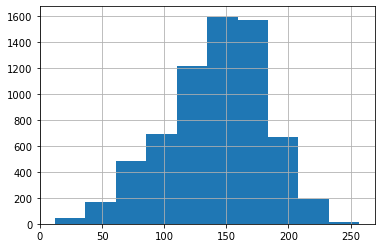

In [118]:
data_df[data_df['Sentiment_numerical'] == 2]["Tweet_Length"].hist()

In [39]:
data_df['message_tokenized']

0                                                       []
1        [advice, Talk, neighbours, family, exchange, p...
2        [Coronavirus, Australia, Woolworths, give, eld...
3        [food, stock, one, empty, PLEASE, panic, ENOUG...
4        [ready, go, supermarket, COVID19, outbreak, pa...
                               ...                        
41152    [Airline, pilots, offering, stock, supermarket...
41153    [Response, complaint, provided, citing, COVID,...
41154    [know, getting, tough, rationing, toilet, pape...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [Well, new, used, Rift, going, 700, 00, Amazon...
Name: message_tokenized, Length: 41159, dtype: object

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,retweeted_from,mentions,hashtags,links,...,message_tokens_lemmatized,Sentiment_numerical,vader_dict,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score,lemmatized_message,Tweet_Length
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],[],[],[],...,"[advice, talk, neighbour, family, exchange, ph...",1.0,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.000,0.923,0.077,0.2500,1.0,advice talk neighbour family exchange phone nu...,187
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[],[],[],['https://t.co/bInCA9Vp8P'],...,"[coronavirus, australia, woolworths, give, eld...",1.0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.000,0.812,0.188,0.4588,0.0,coronavirus australia woolworths give elderly ...,99
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,[],[],"['COVID19france', 'COVID_19', 'COVID19', 'coro...",['https://t.co/zrlG0Z520j'],...,"[food, stock, one, empty, please, panic, enoug...",1.0,"{'neg': 0.101, 'neu': 0.735, 'pos': 0.164, 'co...",0.101,0.735,0.164,0.4824,0.0,food stock one empty please panic enough food ...,174
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive,[],['Tim_Dodson'],[],['https://t.co/cfXch7a2lU'],...,"[news, region, first, confirm, covid, 19, case...",1.0,"{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",0.000,0.916,0.084,0.4939,0.0,news region first confirm covid 19 case come s...,161
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,[],[],['Covid_19'],['https://t.co/ieFDNeHgDO'],...,"[cashier, grocery, store, share, insight, covi...",1.0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.000,0.909,0.091,0.4215,0.0,cashier grocery store share insight covid_19 p...,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive,[],[],[],"['https://t.co/G0Ri0EGP6M', 'https://t.co/qUQ8...",...,"[good, news, soon, announce, high, tech, g, g,...",1.0,"{'neg': 0.054, 'neu': 0.881, 'pos': 0.065, 'co...",0.054,0.881,0.065,0.1298,3.0,good news soon announce high tech g g online l...,178
41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive,[],[],['coronavirus'],[],...,"[exactly, go, open, new, york, city, still, bu...",1.0,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.000,0.862,0.138,0.4939,0.0,exactly go open new york city still buy hand s...,66
41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive,[],[],"['Gold', 'coronavirus', 'safe', 'Spot']",['https://t.co/S8coY5VVgN'],...,"[gold, price, rise, 7, year, high, today, due,...",1.0,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",0.000,0.868,0.132,0.7650,9.0,gold price rise 7 year high today due coronavi...,181
41150,44949,89901,OHIO,14-04-2020,I never that wed be in a situation &amp; worl...,Positive,[],[],"['coronavirus', 'StayHome', 'SocialDistancing']",[],...,"[never, situation, world, go, supermarket, pic...",1.0,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.000,0.878,0.122,0.5106,2.0,never situation world go supermarket pick pack...,124


In [59]:
frequent_terms = utils.getMostCommon(data_df[data_df['Sentiment_numerical'] == 2],100,'message_tokenized')
list(map(list, zip(*frequent_terms)))

[['coronavirus',
  '19',
  'COVID',
  'store',
  'supermarket',
  'grocery',
  'help',
  'food',
  'prices',
  'people',
  'hand',
  'sanitizer',
  'like',
  'workers',
  'shopping',
  'online',
  'consumer',
  'COVID19',
  'safe',
  'need',
  'us',
  'time',
  'get',
  'pandemic',
  'home',
  'Coronavirus',
  'Covid_19',
  'support',
  'Covid',
  'work',
  'keep',
  'free',
  'amp',
  'make',
  'Please',
  'go',
  'local',
  'stock',
  'staff',
  'good',
  'best',
  'Thank',
  'great',
  'going',
  '2',
  'one',
  'please',
  'care',
  'delivery',
  'stay',
  '1',
  'everyone',
  'health',
  'demand',
  'COVID2019',
  'know',
  'working',
  'customers',
  'would',
  'today',
  'see',
  'use',
  'way',
  'many',
  'gt',
  'still',
  'take',
  'retail',
  'employees',
  'due',
  'well',
  'covid',
  'thank',
  'stores',
  'masks',
  'also',
  '3',
  'covid19',
  'new',
  'toiletpaper',
  'spread',
  'Consumer',
  'Stay',
  'business',
  'hands',
  'right',
  'shop',
  'buy',
  'essentia

In [67]:
data_df['mentions']
all_words = []
data_df['mentions'].apply(lambda x: utils.add_words(all_words,x))

0        None
1        None
2        None
3        None
4        None
         ... 
41152    None
41153    None
41154    None
41155    None
41156    None
Name: mentions, Length: 41159, dtype: object

In [113]:
all_words = np.array(all_words)
all_words = all_words[all_words!='']
freq_cnt = np.unique(all_words,return_counts= True)
sorted_indexes = np.argsort(freq_cnt[1])[::-1]


In [118]:
mentions = freq_cnt[0][freq_cnt[1]>1]
freq_cnt[1][freq_cnt[1]>1]

array([31,  2,  4, ...,  3,  3,  5])

In [119]:
mentions = freq_cnt[0][sorted_indexes]
counts = freq_cnt[1][sorted_indexes]

In [123]:
mentions[counts>1]

array(['realDonaldTrump', 'Tesco', 'sainsburys', ..., 'AAI_Official',
       'Radiodotcom', 'SenateDems'], dtype='<U25')

## Topic Modeling
#### I followed the example from https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [105]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/venugopalbhatia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
lemmatizer = WordNetLemmatizer()
pos_tag = nltk.pos_tag
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def lemmatize_message(wordTokens):
    posTags = pos_tag(wordTokens)
    lemmatized_words = []
    for w in posTags:
        if(len(w[0])>3):
            lemmatized_words.append(lemmatizer.lemmatize(w[0],pos=get_simple_tag(w[1])).lower())
    
    return lemmatized_words

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        try:
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        except:
            print(token)
            break
    return result
def preprocess_2(text):
    tokens = gensim.utils.simple_preprocess(text)
    return lemmatize_message(tokens)

def get_simple_tag(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    

In [119]:
processed_docs = data_df['message_cleaned'].astype(str).map(preprocess)


In [120]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 account
1 adequate
2 advice
3 chemist
4 contact
5 create
6 employer
7 exchange
8 family
9 list
10 meds


In [121]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [122]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(23, 1),
 (24, 1),
 (34, 2),
 (46, 1),
 (57, 1),
 (64, 1),
 (212, 1),
 (301, 1),
 (354, 1),
 (554, 1),
 (560, 1),
 (578, 1),
 (630, 1),
 (705, 1),
 (836, 1),
 (912, 1),
 (1124, 1),
 (1210, 1),
 (1213, 1),
 (1355, 1),
 (1602, 1),
 (1887, 1),
 (2359, 1)]

In [123]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 23 ("coronavirus") appears 1 time.
Word 24 ("covid") appears 1 time.
Word 34 ("food") appears 2 time.
Word 46 ("supermarket") appears 1 time.
Word 57 ("paper") appears 1 time.
Word 64 ("toilet") appears 1 time.
Word 212 ("leave") appears 1 time.
Word 301 ("disinfectant") appears 1 time.
Word 354 ("plus") appears 1 time.
Word 554 ("bread") appears 1 time.
Word 560 ("freeze") appears 1 time.
Word 578 ("fruit") appears 1 time.
Word 630 ("meat") appears 1 time.
Word 705 ("rice") appears 1 time.
Word 836 ("pasta") appears 1 time.
Word 912 ("milk") appears 1 time.
Word 1124 ("tonight") appears 1 time.
Word 1210 ("egg") appears 1 time.
Word 1213 ("course") appears 1 time.
Word 1355 ("plenty") appears 1 time.
Word 1602 ("sydney") appears 1 time.
Word 1887 ("chip") appears 1 time.
Word 2359 ("snack") appears 1 time.


In [124]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[]


Tinkered with various number of topics till some topics vaguely made sense

In [137]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)

In [138]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"supermarket" + 0.040*"coronavirus" + 0.025*"covid" + 0.024*"store" + 0.023*"people" + 0.021*"grocery" + 0.018*"shop" + 0.011*"food" + 0.011*"panic" + 0.011*"go"
Topic: 1 
Words: 0.040*"covid" + 0.035*"food" + 0.023*"coronavirus" + 0.023*"store" + 0.019*"grocery" + 0.016*"workers" + 0.014*"demand" + 0.012*"help" + 0.011*"pandemic" + 0.010*"work"
Topic: 2 
Words: 0.047*"covid" + 0.037*"coronavirus" + 0.020*"shop" + 0.018*"online" + 0.017*"sanitizer" + 0.017*"hand" + 0.016*"mask" + 0.015*"store" + 0.012*"home" + 0.012*"supermarket"
Topic: 3 
Words: 0.054*"price" + 0.047*"covid" + 0.028*"consumer" + 0.028*"coronavirus" + 0.011*"pandemic" + 0.010*"market" + 0.007*"impact" + 0.006*"crisis" + 0.005*"change" + 0.005*"global"


#### This is probably painting the picture of 4 broad topics:
1. Topic 0 seems to be about panic buying of groceries and going to supermarkets.
2. Topic 1 seems to be related to grocery store and demand of workers and help possibly lack of work maybe.
3. Topic 2 seems to be aboout online shopping of hand sanitizers and masks and staying at home.
4. Topic 3 seems to be about covid 19 crisis' global market impact and change in prices 

In [141]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.196051  0.034902       1        1  28.351630
0     -0.139801 -0.015304       2        1  25.048146
1      0.021369 -0.106106       3        1  24.341386
2     -0.077619  0.086508       4        1  22.258839, topic_info=            Term         Freq        Total Category  logprob  loglift
206        price  8432.000000  8432.000000  Default  30.0000  30.0000
46   supermarket  7691.000000  7691.000000  Default  29.0000  29.0000
145     consumer  4879.000000  4879.000000  Default  28.0000  28.0000
34          food  6672.000000  6672.000000  Default  27.0000  27.0000
63         store  7970.000000  7970.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
69       grocery  1245.083407  6419.238454   Topic4  -4.5558  -0.1377
36          need   816.391143  3292.012674   Topic4  -4.9778   0.1081
40         stock   625.204457  2135.367338   Topic4  -5.2447   0.2741
327        think   539.829977  1525.332596   Topic4  -5.3915   0.4637
34          food   577.237045  6672.567850   Topic4  -5.3245  -0.9451

[355 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
422       1  0.958853  advantage
422       2  0.005073  advantage
422       3  0.020293  advantage
422       4  0.015220  advantage
1336      1  0.988511   agencies
...     ...       ...        ...
377       4  0.024908    workers
191       1  0.548986      world
191       2  0.134733      world
191       3  0.149815      world
191       4  0.165902      world

[849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [142]:
pyLDAvis.save_html(vis,'lda.html')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
